In [ ]:
import warnings
warnings.filterwarnings(action="ignore")

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
print(os.listdir("../input/images_sample/"))

In [ ]:
import json
import pandas as pd

# сразу загрузим датасет от Renthop
dir="../input/"
with open(dir+'train.json', 'r') as raw_data:
    data = json.load(raw_data)
    df = pd.DataFrame(data)

In [ ]:
## Полезные ссылки
Отбор признаков для машинного обучения на Python
http://datareview.info/article/otbor-priznakov-dlya-mashinnogo-obucheniya-na-python/
    Анализ временных рядов с помощью python
    https://habr.com/post/207160/
Пример решения задачи по машинному обучению на Python
https://neurohive.io/ru/tutorial/primer-reshenija-realnoj-zadachi-po-mashinnomu-obucheniju-na-python/
    Препроцессинг категориальных переменных в sklearn pipeline Python с LabelEncoder
    https://edwvb.blogspot.com/2018/09/preprocessing-kategorialnyh-peremennyh-sklearn-pipeline-python-labelencoder.html
Кодирование категориальных (факторных, номинальных) признаков
https://github.com/Dyakonov/python_hacks/blob/master/dj_cat_coding.ipynb
    Python: категориальные признаки
    https://dyakonov.org/2016/08/03/python-%D0%BA%D0%B0%D1%82%D0%B5%D0%B3%D0%BE%D1%80%D0%B8%D0%B0%D0%BB%D1%8C%D0%BD%D1%8B%D0%B5-%D0%BF%D1%80%D0%B8%D0%B7%D0%BD%D0%B0%D0%BA%D0%B8/

In [ ]:
resulting_features = ["duration", "radiant_win", "tower_status_radiant", "tower_status_dire", 
                      "barracks_status_radiant","barracks_status_dire"]

features = [item for item in data.columns if item not in resulting_features]

Анализ данных
   1.  Понимание задачи: (Постановка и мера качества)
   2. Понимание данных
   3. Формирование признаков (на основе данных)
   4. Предобработка данных
   5. Построение алгоритма
   6. Оценивание качества
   7. Настройка гиперпараметров ( с помощью отложенной выборки, кросс-валидации или других методов)

In [ ]:
Понимание задачи.
1.Тип задачи?
    Регрессия: Y  принадлежит вещественным числам. Сколько денег потеряет банк, 
        если выдаст кредит тому или иному клиенту.
    Классификация: Y = {0, 1}. задача бинарной классификации, где целевая переменная 
        может принимать дискретные значения. Вернет клиент кредит или нет?
    Кластеризация: Y = ?. Нужно найти группы похожих объектов, 
        которые схожи по некоторым признакам.
2. Какая метрика будет измерять качество нашего решения, 
    как мы будем понимать, что мы успешно решили задачу.
    Регрессия — это может быть среднеквадратичная ошибка, 
        то есть средний квадрат отклонения нашего прогноза от правильного ответа 
        по всем объектам. 
        -Или средняя абсолютная ошибка, где квадрат меняется на модуль. 
        Средняя абсолютная ошибка более устойчива к объектам с сильными отклонениями. 
        -Корень среднеквадратичной ошибки.
    Классификация — это может быть:
        доля верных ответов, 
        точность или полнота, 
        площадь под ROC или под кривой точности и полноты. 
    Выбор конкретной метрики зависит от того, какую задачу вы решаете. 
    В кластеризации всё немного сложнее. 
        Там, поскольку нет правильных ответов, нет правильной метрики, 
        и конкретный выбор зависит от вашей задачи. 
    Бывают бизнес-метрики, которые характеризуют коммерческую ценность вашего решения. 

In [ ]:
Данные
    Числовые признаки
    Категориальные признаки: можно делать dummy-кодирование и могут быть полезны счетчики.
    Текстовые прнизнаки :  «мешок слов», вычисление TF-IDF вместо обычного числа вхождения слов в тексты

In [ ]:
Числовые признаки: Возраст, доход. 
        Cними можно работать сразу, но иногда полезнее сделать преобразование, например, от масштабировать их,
        привести к одной шкале.

In [ ]:
Категориальные признаки: Образование, города, цвет. Данные сырые, требуют предобработку. 
        Это признаки, какие-то значения или идентификатор пользователя,на которых нельзя ввести порядок
            и значение которых нельзя сравнивать между собой, можно лишь проверять их равенство друг другу. 
        dummy-кодирование. Один из Самых популярных подходов для работы с ними. 
            Пример: Признак кодирует города: Москва, Санкт-Петербург, Екатеринбург. 
                Значит, чтобы закодировать этот признак, нам понадобится три бинарных признака. 
                 бинарный вид - это представление информации в двоичном виде.
                Москва будет закодирована вектором (1,0,0), Санкт-Петербург—(0,1,0), Екатеринбург—(0,0,1)
            Проблемы dummy-кодирования:
                с уникальными категориями, когда бинарный признак принимает значение 1 лишь один раз. 
                    В этом случае алгоритм машинного обучения не сможет найти никаких зависимостей. 
                    Это будет не очень полезный признак. В таких случаях, можно объединять редкие категории 
                    в одну, то есть города, которые встречаются редко, мы объявим одним городом.
                Категория считается редкой, если она встречается в выборке меньше r раз, при этом 
                    r — это некоторый параметр, который имеет смысл настраивать по кросс-валидации 
                    или по отложенной выборке. 
                Огромная выборка: категориальные признаки, могут принимать очень много различных значений,
                    на которую будет очень тяжело обучиться. 
                    Чтобы решить проблему, можно воспользоваться счетчиками. 
        Счетчики: Меняем категориальный признак на вероятность этого значения.
            Обозначим эту оценку через c(uk). Ее легко вычислить: нужно посчитать, сколько всего 
                в выборке объектов, которые относятся к первому классу и у которых j-й признак 
                принимает значение uk, и поделить на число объектов, у которых j-й признак принимает 
                значение uk. Это и будет оценкой вероятности. 
            У этого подхода могут быть некоторые проблемы с переобучением, если имеются категориальные 
            значения, которые встречаются довольно редко.
        Решение проблемы с переобучением:
                можно вычислять счетчики с помощью кросс-валидации, а именно: 
                разобьем выборку на k частей и в i-й части будем заменять категории на вероятности, 
                оцененные по остальным частям, кроме i-й. 
                Для контрольной же выборки будем использовать оценки, вычисленные по всей обучающей выборке. 



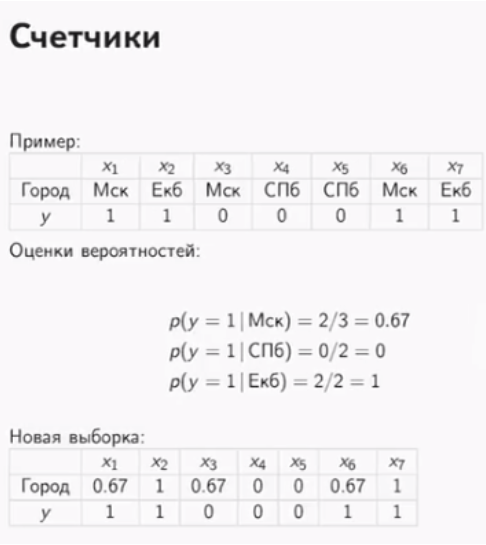

Текстовые признаки: например, описание товара на странице интернет-магазина.
    текст—это последовательность слов w1, w2 и т.д., выводы о тексте можно сделать, даже если слова перемешаны.


 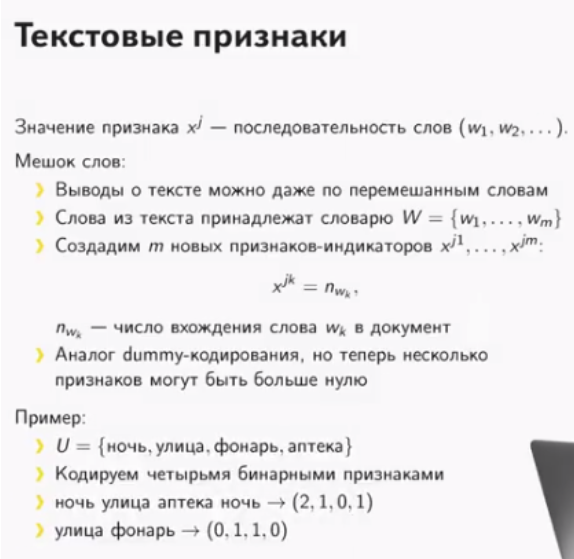  
  


  Можно немного улучшить этот подход. 
Будем вычислять не количество слов в тексте, а некоторые оценки их важности для текста. 
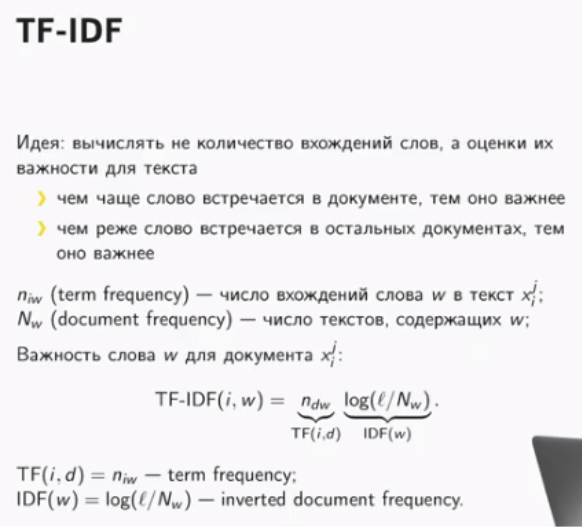


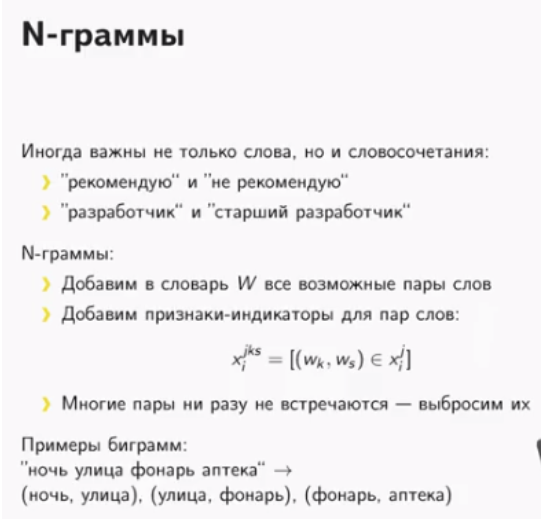

In [ ]:
    Изображения, сигналы:
    Координаты:
    
    Более сложные признаки: сырые, категориальные, текстовые или что-то ещё, то нужны специальные 
        преобразования, чтобы получить из них числа.
    Когда мы поняли, на основе каких данных будем решать задачу, нужно учиться 
    формировать по ним признаки или создавать матрицу «объекты-признаки», 
    по которой уже дальше будет обучаться алгоритм машинного обучения.
        

In [ ]:
from datetime import datetime
#datetime.date('2012, 13, 14')
datetime_object = datetime.strptime('Jun 1 2005  1:33PM', '%b %d %Y %I:%M%p')
datetime.date(datetime_object).strftime("%Y:%m:%d %I:%M")


datetime_object = datetime.strptime('Jun 1 2005  1:33PM', '%b %d %Y %I:%M%p')

#2017-06-25 15:33:07
% b Месяц по сокращенному имени локалей (июнь)

% d День месяца как десятичное число с нулевым запасом (1)

% Y Год со столетием как десятичное число (2015)

% I Час (12-часовые часы) в виде десятичного числа с нулевой задержкой (01)

% M Минута как десятичное число с нулевым запасом (33)

% p Локальный эквивалент AM или PM (PM)

In [ ]:
# Function to calculate missing values by column Функция для вычисления отсутствующих значений по столбцу
def missing_values_table(df):
        # Total missing values Всего отсутствующих значений
        mis_val = df.isnull().sum()
        
        # Percentage of missing values Процент недостающих значений
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results Сделать таблицу с результатами
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns Переименовать столбцы
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending Сортировка таблицы по проценту отсутствующего нисходящего
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information Распечатайте краткую информацию
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values столбцов, у которых отсутствуют значения.")
        
        # Return the dataframe with missing information Возврат данных с отсутствующей информацией
        return mis_val_table_ren_columns

In [ ]:
missing_values_table(df_train)

In [ ]:
Формирование признаков (feature engineering).

Задача: получить матрицу - объекты - признаки
    Преобразование числовых признаков
        На основе числовых признаков можно придумывать новые признаки. Это искусство. 
            Здесь нельзя дать конкретных рекомендаций.
        Получение итоговых сумм за предыдущий период (просуммировать кол-во товара * цену)
            Это будет очень сильный признак, который скорее всего повысит качество вашего алгоритма.
        Масштабирование признаков
            Важно для метрических, линейных, нейросетевых моделей.
            Не важно для логических методов (решающими деревьями).
        Трансформация признаков: 
            Есть хорошее правило: распределение признаков должно быть близким к нормальному. 
            Логарифмирование данных. ( можно взять логарифм от значения признака + 1 x^(j)=log(x(j)+1))
        На основе числовых признаков можно придумывать новые признаки. 
Это искусство. 
Здесь нельзя дать конкретных рекомендаций.

    Извлечение числовых признаков из категориальных и текстовых

In [ ]:
Масштабирование признаков
    Среднее и стандартное отклонение: состоит в том, чтобы вычесть из признака среднее значение 
        по всем объектам и поделить на дисперсию, которая также оценивается по всем объектам. 
    На отрезок [0, 1]: вычесть минимальное значение по всем объектам и поделить на расстояние 
        между максимальным и минимальным. 
    Оба способа работают примерно одинаково, но можно их сравнить, например, с помощью кросс-валидации. 


In [ ]:
Предобработка данных (Мусор на входе - мусор на выходе)
    Ошибки
    Выбросы (алгоритм будет настраиваться не на ту разметку, его качество будет хуже)
    Шумы в признаках
    Пропущенные значения (Без них ничего не будет работать)

In [ ]:
Построение алгоритма
    Основные семейства в задачах обучения с учителем
        Линейные модели
        Композиции деревьев (градиентный бустинг, случайный лес)
        Нейронные сети (глубокое обучение - много слоев, сложная архитектура)
             свёрточные нейронные сети или рекуррентные
    Отбор признаков
    Понижение размерности
    Оценка качества
        Отложенная выборка
        Кросвалидация (Сколько блоков? 5 или 10)
        Как разбить данные на блоки
    Настройка гиперпараметров

In [ ]:
Магические функции Python
%debug [--breakpoint FILE:LINE] [statement [statement ...]] #Активируйте интерактивный отладчик. Установите точку останова на линии в файле.
%env # Получить, установить или перечислить переменные среды.
%set_env #Установите переменные среды.
%logstart # Начните запись в любом месте сеанса.
% logstart [-o | -r | -t | -q] [log_name [log_mode]]
%logstop # Полностью прекратить запись в журнал и закрыть файл журнала.
%matplotlib
%matplotlib [-l] [gui] # Настройте matplotlib для работы в интерактивном режиме.
%notebook - %notebook filename # Экспортируйте и конвертируйте записные книжки IPython.
%pprint # Включить / выключить красивую печать.
%pwd # Вернуть текущий рабочий каталог.
%time # Время выполнения оператора или выражения Python.
%who_ls # Вернуть отсортированный список всех интерактивных переменных.
%xdel # Удалите переменную, пытаясь очистить ее отовсюду, где механизм IPython имеет ссылки на нее.

Анализ данных

In [ ]:
#Метод describe показывает основные статистические характеристики данных по каждому числовому признаку (типы int64 и float64): 
#число непропущенных значений, среднее, стандартное отклонение, диапазон, медиану, 0.25 и 0.75 квартили.
#df.info()
#df_av_kpi.describe()
#df.describe(include=['object', 'bool'])
df_train.info(), df_train.describe(), df_train.describe(include=['object', 'bool'])
#Чтобы посмотреть статистику по нечисловым признакам, нужно явно указать интересующие нас типы в параметре include.
#Для категориальных (тип object) и булевых (тип bool) признаков можно воспользоваться методом value_counts. 
#Посмотрим на распределение данных по нашей целевой переменной —
df_train['target'].value_counts() #Раскладывает по значениям признака

In [ ]:
Сортировка
DataFrame можно отсортировать по значению какого-нибудь из признаков. 
(ascending=False для сортировки по убыванию):
df.sort_values(by='Total day charge', ascending=False).head()

Сортировать можно и по группе столбцов:
    
df.sort_values(by=['Churn', 'Total day charge'],
        ascending=[True, False]).head()

Индексация и извлечение данных

Объект DataFrame имеет 2 индекса: по строкам и по столбцам. Если индекс по строкам явно не задан (например, колонка по которой нужно их строить), то pandas задаёт целочисленный индекс RangeIndex от 0 до N-1, где N это количество строк в таблице.
df.index.name = 'Country Code' так можно дать имя индексу
df.columns - колонки
df.index - строки

к столбцам можно обращаться, используя атрибут или нотацию словарей Python, т.е. df.population и df['population'] это одно и то же.

Очень удобной является логическая индексация DataFrame по одному столбцу. Выглядит она следующим образом: df[P(df['Name'])], где P — это некоторое логическое условие, проверяемое для каждого элемента столбца Name. Итогом такой индексации является DataFrame, состоящий только из строк, удовлетворяющих условию P по столбцу Name.

Датафреймы можно индексировать как по названию столбца или строки, так и по порядковому номеру. 
Для индексации по названию используется метод loc, по номеру — iloc.
df.loc[0:5, 'A':'D']
df.iloc[0:5, 0:4]
Если нам нужна первая или последняя строчка датафрейма, пользуемся конструкцией df[:1] или df[-1:]:


In [ ]:
Применение функций к ячейкам, столбцам и строкам

Применение функции к каждому столбцу: apply - df.apply(np.max)
Метод apply можно использовать и для того, чтобы применить функцию к каждой строке. Для этого нужно указать axis=1.

Применение функции к каждой ячейке столбца: map
    метод map можно использовать для замены значений в колонке, 
    передав ему в качестве аргумента словарь вида {old_value: new_value}:
d = {'No' : False, 'Yes' : True}
df.head()
Аналогичную операцию можно провернуть с помощью метода replace:
df = df.replace({'Voice mail plan': d})
df.head()

In [ ]:
Группировка данных
df.groupby(by=grouping_columns)[columns_to_show].function()
К датафрейму применяется метод groupby, который разделяет данные по grouping_columns – признаку или набору признаков.
Выбираем нужные нам столбцы (columns_to_show).
К полученным группам применяется функция или несколько функций.

Группирование данных в зависимости от значения признака Churn и вывод статистик по трём столбцам в каждой группе.

columns_to_show = ['Total day minutes', 'Total eve minutes', 'Total night minutes']
Тип данных столбцов должен быть числовой
df.groupby(['Churn'])[columns_to_show].describe(percentiles=[])
df.set_index(["Person", "Single"]).count(level="Person") #Подсчитывает для 
Сделаем то же самое, но немного по-другому, передав в agg список функций:
grouped['D'].agg({'result1' : np.sum, 'result2' : np.mean})
columns_to_show = ['Total day minutes', 'Total eve minutes', 'Total night minutes']
df.groupby(['Churn'])[columns_to_show].agg([np.mean, np.std, np.min, np.max]) 

f = {'A':['sum','mean'], 'B':['prod']}
df.groupby('GRP').agg(f)
#Поскольку агрегатная функция работает в Series, ссылки на другие имена столбцов теряются. 
#Чтобы обойти это, вы можете ссылаться на полный блок данных и индексировать его, 
#используя индексы группы в лямбда-функции.
f = {'A':['sum','mean'], 'B':['prod'], 'D': lambda g: df.ix[g.index].E.sum()}
df.groupby('GRP').agg(f)

titanic_df.groupby(['Sex', 'Survived'])['PassengerID'].count()

In [ ]:
Сводные таблицы
Допустим, мы хотим посмотреть, как наблюдения в нашей выборке распределены в контексте двух признаков — Churn и International plan. 
Для этого мы можем построить таблицу сопряженности, воспользовавшись методом crosstab:

pd.crosstab(df['Churn'], df['International plan'])
pd.crosstab(df['Churn'], df['Voice mail plan'], normalize=True)

сводные таблицы (pivot tables)
метод pivot_table, который принимает в качестве параметров:
    values – список переменных, по которым требуется рассчитать нужные статистики,
    index – список переменных, по которым нужно сгруппировать данные,
    aggfunc — то, что нам, собственно, нужно посчитать по группам — сумму, среднее, максимум, минимум или что-то ещё.
pvt = titanic_df.pivot_table(index=['Sex'], columns=['PClass'], values='Name', aggfunc='count')
В качестве индекса теперь у нас будет пол человека, колонками станут значения из PClass, 
функцией агрегирования будет count (подсчёт количества записей) по колонке Name.
df.pivot_table(['Total day calls', 'Total eve calls', 'Total night calls'], 
['Area code'], aggfunc='mean').head(10)

In [ ]:
Преобразование датафреймов
Создание:
df = pd.DataFrame({'country': ['Kazakhstan', 'Russia', 'Belarus', 'Ukraine'],
    'population': [17.04, 143.5, 9.5, 45.5],
    'square': [2724902, 17125191, 207600, 603628]})
столбец в DataFrame это Series. Создадим объект total_calls типа Series и вставим его в датафрейм:

total_calls = df['Total day calls'] + df['Total eve calls'] + \
                  df['Total night calls'] + df['Total intl calls']
df.insert(loc=len(df.columns), column='Total calls', value=total_calls) 
# loc - номер столбца, после которого нужно вставить данный Series
# мы указали len(df.columns), чтобы вставить его в самом конце

Добавить столбец из имеющихся можно и проще, не создавая промежуточных Series:
df['Total charge'] = df['Total day charge'] + df['Total eve charge'] + df['Total intl charge']
    
Чтобы удалить столбцы или строки, воспользуйтесь методом drop, передавая в качестве аргумента нужные индексы 
и требуемое значение параметра axis (1, если удаляете столбцы, и ничего или 0, если удаляете строки):
    
df = df.drop(['Total charge', 'Total calls'], axis=1) #удалить столбцы
df.drop([1, 2]).head() # а вот так можно удалить строчки    
df = df.dropna(axis=1, how='any') 
    # Аргумент axis=1 у dropna означает "удалить столбцы, а не строки", 
    #и how='any' означает "удалить столбец, если хотя бы одно значение пусто".
Переименование столбцов
Переименовывать столбцы нужно через метод rename:
    df = df.rename(columns={'Country Code': 'country_code'})

In [ ]:
Анализ временных рядов
для правильного перевода строки в нужный тип, можно использовать метод pandas.to_datetime.

In [ ]:
Первые попытки прогнозирования
Посмотрим, как target связан с признаком "A" (любой столбец). 
Сделаем это с помощью сводной таблички crosstab, а также путем иллюстрации с Seaborn
pd.crosstab(df['target'], df['A'], margins=True)

In [ ]:
Визуализация данных в pandas с использованием библиотеки matplotlib



In [ ]:
# индекс, по которому будем отделять обучающую выборку от тестовой
idx_split = df_train.shape[0]#индекс последнего элемента
data_full = pd.concat([df_train, df_test])
#формируем генеральную выборку из тренирующей и тестовой для одинаковой обработки


In [ ]:
dbs1=dbs_1.apply(lambda x: x.fillna(x.min()),axis=1)
df_fe.iloc[:, 2:] = df_fe.iloc[:, 2:].apply(lambda x: x.map(meg_preproc),axis=1).astype(np.float64)
df_vo.VOICE_DUR_MIN = df_vo.VOICE_DUR_MIN.map(meg_preproc)
df_vo.VOICE_DUR_MIN = df_vo.VOICE_DUR_MIN.astype(np.float32)
df_vo['CELL_LAC_ID'] = df_vo.CELL_LAC_ID.map(lambda x: round(x))
df_vo.drop(['START_TIME'], axis=1, inplace=True)
df_fe_test['T_DATE'] = df_fe_test.SNAP_DATE.map(lambda x: no_year(x))
dfe1 = dfe1.apply(lambda x: x.map(meg_preproc),axis=1).astype(np.float64)
dfe1 = dfe1.apply(lambda x: x.fillna(x.mean()),axis=1)


In [ ]:
col = ['DATA_VOL_MB', 'CELL_AVAILABILITY_2G',
       'CELL_AVAILABILITY_3G', 'CELL_AVAILABILITY_4G', 'PSSR_3G',
       'UTIL_CE_UL_3G', 'AVEUSERNUMBER_PLMN', 'AVR_DL_USER_3G',
       'AVR_UL_HSPA_USER', 'AVR_UL_R99_USER', 'DL_AVR_THROUGHPUT_3G',
       'RELATIVE_RBU_USED_DL', 'VOICE_DUR_MIN', 'MON', 'SUM_MINUTES',
       'SUM_DATA_MB', 'SUM_DATA_MIN']
dfall_res=dfall.groupby('SK_ID')[col].sum()

In [ ]:
dfall = dfall.merge(df_fe, left_on=['SK_ID'],  right_on=['SK_ID'])

In [ ]:
file_path = '../input/condition_csi/dataset/bs_avg_kpi.csv'
file_kpi = open(file_path, mode='r')
columns = file_kpi.readline()
columns = columns.split(';')
df_kpi = pd.DataFrame(data=np.zeros((int(1e6), len(columns))),
columns=columns, dtype=np.float32)

In [ ]:
block = []
for i, row in tqdm_notebook(enumerate(file_kpi)):
if i > 1e6:
break
if i % 10000 == 0: 
print(i, len(block))
df_kpi.loc[(i - 10000): i + 1] = np.array(block)
block = []
row = row.split(';')
row = list(map(to_number, row))
block.append(row)

In [ ]:
total_price = pd.DataFrame(df.groupby('order_id').price.sum())
total_price.columns = ['total_price']
df = df.merge(total_price, on='order_id')

In [ ]:
# your code Какая самая популярная категория товара?
df1=df.groupby(df['item_name'], as_index=True).sum().sort('quantity', ascending=False)
print ('Cамая популярная категория товара - ', df1.index[0])
#ascending=True сортировка по возраст, false-по убыванию

In [ ]:
ПРЕОБРАЗОВАНИЕ ТИПОВ ДАННЫХ В PYTHON 3

In [ ]:
Строки
Строка представляет собой последовательность из одного или нескольких символов (букв, цифр и других символов), которые могут быть постоянными или переменными. В Python троки обозначаются одинарными (‘) или двойными кавычками («). Чтобы создать строку, заключите последовательность символов в кавычки:

'This is a string in single quotes.'

In [ ]:
Списки
Список – это изменяемая, упорядоченная последовательность элементов. Значения, которые находятся в списке, называются элементами. Подобно тому, как строки определяются кавычками, списки определяются квадратными скобками ([]).
sea_creatures = ['shark', 'cuttlefish', 'squid', 'mantis shrimp']

In [ ]:
#Кортежи
#Кортеж (tuple) позволяет группировать данные. Кортеж – это неизменяемая упорядоченная последовательность элементов.
#Кортежи очень похожи на списки, но вместо квадратных скобок они используют круглые скобки. 
coral = ('blue coral', 'staghorn coral', 'pillar coral')

In [ ]:
Словари
Словарь – это неупорядоченный изменяемый массив данных, состоящий из пар «ключ-значение». Словари обозначаются фигурными скобками ({}).
Словари обычно хранят связанные данные. Словарь имеет такой вид:
{'name': 'Jake', 'animal': 'dog', 'color': 'yellow', 'location': 'Tree Fort'}

In [ ]:
Визуализация

In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pd.options.display.max_rows = 7
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 3)
plt.rcParams['font.family'] = 'sans-serif'

In [ ]:
#сайт исторических данных о погоде в Канаде
url_template = "http://climate.weather.gc.ca/climate_data/bulk_data_e.html?format=csv&stationID=5415&Year={year}&Month={month}&timeframe=1&submit=Download+Data"
#Чтобы получить данные за март 2012, мы должны форматировать строку с month=3, year=2012.
url = url_template.format(month=3, year=2012)
#weather_mar2012 = pd.read_csv(url, skiprows=15, index_col='Date/Time', parse_dates=True, encoding='latin1')
#В начале файла 16 строк метаданных, но pandas знает, что CSV могут быть странными, 
#поэтому у read_csv есть опция skiprows.
#устанавливаем 'Date/Time' в качестве индекса

In [ ]:
url_template

In [ ]:
url

In [ ]:
#weather_mar2012 = pd.read_csv(url, skiprows=15, index_col='Date/Time', parse_dates=True, encoding='latin1')
#Kaggel не дает закачивать файл

In [ ]:
weather_2012_final = pd.read_csv('data/weather_2012.csv', index_col='Date/Time')
weather_2012_final['Temp (C)'].plot(figsize=(18, 6))

In [ ]:
#Построим график по значениям столбца 'А'!
df["A"].plot(figsize=(15, 5))

In [ ]:
#Объединение dataframe с помощью pd.concat

In [ ]:
def download_weather_month(year, month):
    url = url_template.format(year=year, month=month)
    weather_data = pd.read_csv(url, skiprows=15, index_col='Date/Time', parse_dates=True)
    weather_data = weather_data.dropna(axis=1)
    weather_data.columns = [col.replace('\xb0', '') for col in weather_data.columns]
    weather_data = weather_data.drop(['Year', 'Day', 'Month', 'Time', 'Data Quality'], axis=1)
    return weather_data

In [ ]:
data_by_month = [download_weather_month(2012, i) for i in range(1, 13)]

In [ ]:
weather_2012 = pd.concat(data_by_month)
weather_2012

In [ ]:
Чистка данных

In [ ]:
УДАЛЕНИЕ СТРОК И СТОЛБЦОВ
По умолчанию dropna и drop всегда удаляют строки (axis=0).
df = df.drop(['Year', 'Month', 'Day', 'Time', 'Data Quality'], axis=1)# удаление столбцов


1.Посмотреть на то, какой тип данных имеет тот или иной признак, можно, используя метод dataframe.info():
2. удалить признаки, в которых пропусков больше 50%.
3. Затем стоит избавиться от выбросов. Они могут быть связаны с опечатками, ошибками в единицах измерения или являться корректными, но чересчур экстремальными значениями. 
    нижний внутренний забор: Q1 - 1.5 * IQ
    верхний внутренний забор: Q3 + 1,5 * IQ
    нижний внешний забор: Q1 - 3 * IQ
    верхний наружный забор: Q3 + 3 * IQ
    Точка за пределами внутреннего забора с обеих сторон считается мягким выбросом . Точка за внешним забором считается экстремальным выбросом .

In [ ]:
# Function to calculate missing values by column Функция для вычисления отсутствующих значений по столбцу
def missing_values_table(df):
        # Total missing values Всего отсутствующих значений
        mis_val = df.isnull().sum()
        
        # Percentage of missing values Процент недостающих значений
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results Сделать таблицу с результатами
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns Переименовать столбцы
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending Сортировка таблицы по проценту отсутствующего нисходящего
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information Распечатайте краткую информацию
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values столбцов, у которых отсутствуют значения.")
        
        # Return the dataframe with missing information Возврат данных с отсутствующей информацией
        return mis_val_table_ren_columns

In [ ]:
missing_values_table(df)

In [ ]:
#set автоматически удалит дубликаты. ? list вернет его в список.- не увидел
x = set(df['choice_description']) #Возвращает набор без дубликатов. 
len(list(x))

многие признаки, являющиеся изначально числовыми (например, площади), интерпретированы как object. Анализировать их крайне сложно, так что сначала конвертируем их в числа, а именно в тип float.

# Replace all occurrences of Not Available with numpy not a number
Заменим значение “Not Available” в данных на «не число» ( np.nan — «not a number»), которое Python все же интерпретирует как число. Это позволит изменить тип соответствующих числовых признаков на float:
data = data.replace({'Not Available': np.nan})

In [ ]:
# Iterate through the columns # Итерация через столбцы
for col in list(data.columns):
    # Select columns that should be numeric Выберите столбцы, которые должны быть числовыми
    if ('ft²' in col or 'kBtu' in col or 'Metric Tons CO2e' in col or 'kWh' in 
        col or 'therms' in col or 'gal' in col or 'Score' in col):
        # Convert the data type to float Преобразовать тип данных в float
        data[col] = data[col].astype(float)

# Statistics for each column Метод describe показывает основные статистические характеристики данных по каждому числовому признаку (типы int64 и float64): число непропущенных значений, среднее, стандартное отклонение, диапазон, медиану, 0.25 и 0.75 квартили.
df.describe()

In [ ]:
df.isnull().sum()

In [ ]:
удалить признаки, в которых пропусков больше 50%.

In [ ]:
#a=df[df.notnull()].count()
a=df[df.isnull()].count()
i=0
for x in a: 
    print(i, ' - ',df.columns[i], ' - ', x)
    i+=1

In [ ]:
df[df.display_address.notnull()].count()

In [ ]:
np.log как способ борьбы со слишком большими числами, не помещающимися в np.float64.

In [ ]:
#df['dow'] = df['created'].apply(lambda x: x.date().weekday())
#df['is_weekend'] = df['created'].apply(lambda x: 1 if x.date().weekday() in (5, 6) else 0)

In [ ]:
Предварительный анализ данных
https://neurohive.io/ru/machine-learning-cases/primer-reshenija-realnoj-zadachi-po-mashinnomu-obucheniju-na-python/
Что такое выбросы в данных? https://www.itl.nist.gov/div898/handbook/prc/section1/prc16.htm
    

In [ ]:
#Какая средняя/минимальная/максимальная величина значения у столбца?
df['price'].describe()

In [ ]:
type(9) is int
type(2.5) is float
type('x') is str
type(u'x') is unicode
type(2+3j) is complex
import types
>>> x = "mystring"
>>> isinstance(x, types.StringType)
True
>>> x = 5
>>> isinstance(x, types.IntType)
True
>>> x = None
>>> isinstance(x, types.NoneType)
True

In [ ]:
Есть много столбцов, которые почти полностью пусты. Давайте удалим их с помощью функции dropna.
Аргумент axis=1 у dropna означает "удалить столбцы, а не строки", 
и how='any' означает "удалить столбец, если хотя бы одно значение пусто".
weather_mar2012 = weather_mar2012.dropna(axis=1, how='any')

In [ ]:
from scipy.spatial import distance

In [ ]:
#проекция на окружность с последующим использованием двух координат.
#Такое преобразование сохраняет дистанцию между точками, 
#что важно для некоторых алгоритмов, основанных на расстоянии (kNN, SVM, k-means...)

def make_harmonic_features(value, period=24):
    value *= 2 * np.pi / period
    return np.cos(value), np.sin(value)
from scipy.spatial import distance

#distance(make_harmonic_features(23), make_harmonic_features(1))
#out: 0.5176380902050424

#euclidean(make_harmonic_features(9), make_harmonic_features(11))
#Out: 0.5176380902050414

#euclidean(make_harmonic_features(9), make_harmonic_features(21))
#Out: 2.0

In [ ]:
#Нормализация и изменение распределения
#Самая простая трансформация – это Standart Scaling (она же Z-score normalization).
from sklearn.preprocessing import StandardScaler  

from scipy.stats import beta
from scipy.stats import shapiro
data = beta(1, 10).rvs(1000).reshape(-1, 1)

shapiro(data)
#Out: (0.8783774375915527, 3.0409122263582326e-27)
# значение статистики, p-value 
#StandartScaling хоть и не делает распределение нормальным в строгом смысле слова...
#… но в какой-то мере защищает от выбросов
shapiro(StandardScaler().fit_transform(data))
#Out: (0.8783774375915527, 3.0409122263582326e-27)
# с таким p-value придется отклонять нулевую гипотезу о нормальности данных

In [ ]:
data = np.array([1, 1, 0, -1, 2, 1, 2, 3, -2, 4, 100]).reshape(-1, 1).astype(np.float64)
StandardScaler().fit_transform(data)

In [ ]:
(data-data.mean()) / data.std()

In [ ]:
https://habr.com/company/ods/blog/325422/

In [ ]:
import numpy as np
import pandas as pd
import json
from sklearn.base import TransformerMixin

EPSILON = 1e-5


class FeatureEngineer(TransformerMixin):

    def apply(self, df, k, condition):
        df[k] = df['features'].apply(condition)
        df[k] = df[k].astype(np.int8)

    def fit(self, X, y=None, **fit_params):
        return self

    def transform(self, X, y=None):
        df = X.copy()

        df.features = df.features.apply(lambda x: ' '.join([y.replace(' ', '_') for y in x]))
        df.features = df.features.apply(lambda x: x.lower())
        df.features = df.features.apply(lambda x: x.replace('-', '_'))

        for k, condition in (('dishwasher', lambda x: 'dishwasher' in x),
                             ('doorman', lambda x: 'doorman' in x or 'concierge' in x),
                             ('pets', lambda x: "pets" in x or "pet" in x or "dog" in x or "cats" in x and "no_pets" not in x),
                             ('air_conditioning', lambda x: 'air_conditioning' in x or 'central' in x),
                             ('parking', lambda x: 'parking' in x),
                             ('balcony', lambda x: 'balcony' in x or 'deck' in x or 'terrace' in x or 'patio' in x),
                             ('bike', lambda x: 'bike' in x),
                             ('storage', lambda x: 'storage' in x),
                             ('outdoor', lambda x: 'outdoor' in x or 'courtyard' in x or 'garden' in x),
                             ('roof', lambda x: 'roof' in x),
                             ('gym', lambda x: 'gym' in x or 'fitness' in x),
                             ('pool', lambda x: 'pool' in x),
                             ('backyard', lambda x: 'backyard' in x),
                             ('laundry', lambda x: 'laundry' in x),
                             ('hardwood_floors', lambda x: 'hardwood_floors' in x),
                             ('new_construction', lambda x: 'new_construction' in x),
                             ('dryer', lambda x: 'dryer' in x),
                             ('elevator', lambda x: 'elevator' in x),
                             ('garage', lambda x: 'garage' in x),
                             ('pre_war', lambda x: 'pre_war' in x or 'prewar' in x),
                             ('post_war', lambda x: 'post_war' in x or 'postwar' in x),
                             ('no_fee', lambda x: 'no_fee' in x),
                             ('low_fee', lambda x: 'reduced_fee' in x or 'low_fee' in x),
                             ('fire', lambda x: 'fireplace' in x),
                             ('private', lambda x: 'private' in x),
                             ('wheelchair', lambda x: 'wheelchair' in x),
                             ('internet', lambda x: 'wifi' in x or 'wi_fi' in x or 'internet' in x),
                             ('yoga', lambda x: 'yoga' in x),
                             ('furnished', lambda x: 'furnished' in x),
                             ('multi_level', lambda x: 'multi_level' in x),
                             ('exclusive', lambda x: 'exclusive' in x),
                             ('high_ceil', lambda x: 'high_ceil' in x),
                             ('green', lambda x: 'green_b' in x),
                             ('stainless', lambda x: 'stainless_' in x),
                             ('simplex', lambda x: 'simplex' in x),
                             ('public', lambda x: 'public' in x),
                             ):
            self.apply(df, k, condition)

        df['bathrooms'] = df['bathrooms'].apply(lambda x: x if x < 5 else 5)
        df['bedrooms'] = df['bedrooms'].apply(lambda x: x if x < 5 else 5)
        df["num_photos"] = df["photos"].apply(len)
        df["num_features"] = df["features"].apply(len)
        created = pd.to_datetime(df.pop("created"))
        df["listing_age"] = (pd.to_datetime('today') - created).apply(lambda x: x.days)
        df["room_dif"] = df["bedrooms"] - df["bathrooms"]
        df["room_sum"] = df["bedrooms"] + df["bathrooms"]
        df["price_per_room"] = df["price"] / df["room_sum"].apply(lambda x: max(x, .5))
        df["bedrooms_share"] = df["bedrooms"] / df["room_sum"].apply(lambda x: max(x, .5))
        df['price'] = df['price'].apply(lambda x: np.log(x + EPSILON))

        key_types = df.dtypes.to_dict()
        for k in key_types:
            if key_types[k].name not in ('int64', 'float64', 'int8'):
                df.pop(k)

        for k in ('latitude', 'longitude', 'listing_id'):
            df.pop(k)
        return df


def encode(x):
    if x == 'low':
        return 0
    elif x == 'medium':
        return 1
    elif x == 'high':
        return 2


def get_data():
    
    with open('../input/train.json', 'r') as raw_data:
        data = json.load(raw_data)

    df = pd.DataFrame(data)
    target = df.pop('interest_level').apply(encode)

    df = FeatureEngineer().fit_transform(df)
    return df, target

In [ ]:
x_data, y_data = get_data()
x_data.head(5)

In [ ]:
x_data = x_data.values
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
cross_val_score(LogisticRegression(), x_data, y_data, scoring='neg_log_loss').mean()

In [ ]:
from sklearn.preprocessing import StandardScaler
cross_val_score(LogisticRegression(), StandardScaler().fit_transform(x_data), y_data, scoring='neg_log_loss').mean()

In [ ]:
# ого! действительно помогает!

In [ ]:
from sklearn.preprocessing import MinMaxScaler
cross_val_score(LogisticRegression(), MinMaxScaler().fit_transform(x_data), y_data, scoring='neg_log_loss').mean()

In [ ]:
# a на этот раз – нет :( 

In [ ]:
трансформации и создание новых признаков

Необязательно руководствоваться жизненной логикой. Если признаков не очень много, вполне можно сгенерировать все возможные взаимодействия и потом отсеять лишние, используя одну из техник

In [ ]:
https://habr.com/company/ods/blog/325422/
    

In [ ]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.datasets import make_classification
x_data_generated, y_data_generated = make_classification()
x_data_generated.shape

In [ ]:
x_data_generated

In [ ]:
x_data_generated.shape

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
#i='SUM_DATA_MIN'
com_cat=x_data_generated
#key_types = com_cat.dtypes
#print (i,key_types)
#com_cat=com_cat.map(meg_preproc).astype(np.float64)

 
sm.qqplot(com_cat, loc=com_cat.mean(), scale=com_cat.std())

In [ ]:
VarianceThreshold(.7).fit_transform(x_data_generated).shape

In [ ]:
VarianceThreshold(.8).fit_transform(x_data_generated).shape

In [ ]:
VarianceThreshold(.9).fit_transform(x_data_generated).shape

способы, также основанные на классической статистике.

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
x_data_kbest = SelectKBest(f_classif, k=5).fit_transform(x_data_generated, y_data_generated)
x_data_varth = VarianceThreshold(.9).fit_transform(x_data_generated)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
cross_val_score(LogisticRegression(), x_data_generated, y_data_generated, scoring='neg_log_loss').mean()

In [ ]:
cross_val_score(LogisticRegression(), x_data_kbest, y_data_generated, scoring='neg_log_loss').mean()

In [ ]:
cross_val_score(LogisticRegression(), x_data_varth, y_data_generated, scoring='neg_log_loss').mean()

Отбор с использованием моделей
Организация обработки в виде последовательной цепи преобразований (Pipeline) позволяет сделать этот процесс единообразным. Это полезно не только с точки зрения поддержки и внесения изменений в сложные процедуры предобработки данных, состоящие из многих этапов. Представление этапов обработки данных в виде Pipeline   упрощает процесс подбора параметров, определяющих результаты этапов обработки. Для подбора параметров в этом случае может использоваться, например, GridSearchCV.

In [ ]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

x_data_generated, y_data_generated = make_classification()

pipe = make_pipeline(SelectFromModel(estimator=RandomForestClassifier()),
                     LogisticRegression())

lr = LogisticRegression()
rf = RandomForestClassifier()

print(cross_val_score(lr, x_data_generated, y_data_generated, scoring='neg_log_loss').mean())
print(cross_val_score(rf, x_data_generated, y_data_generated, scoring='neg_log_loss').mean())
print(cross_val_score(pipe, x_data_generated, y_data_generated, scoring='neg_log_loss').mean())

In [ ]:

import warnings
warnings.filterwarnings(action="ignore")
x_data, y_data = get_data()
x_data = x_data.values

pipe1 = make_pipeline(StandardScaler(),
                      SelectFromModel(estimator=RandomForestClassifier()),
                      LogisticRegression())

pipe2 = make_pipeline(StandardScaler(),
                      LogisticRegression())

rf = RandomForestClassifier()

print('LR + selection: ', cross_val_score(pipe1, x_data, y_data, scoring='neg_log_loss').mean())
print('LR: ', cross_val_score(pipe2, x_data, y_data, scoring='neg_log_loss').mean())
print('RF: ', cross_val_score(rf, x_data, y_data, scoring='neg_log_loss').mean())


In [ ]:
from __future__ import print_function
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
import pandas as pd

Организация обработки в виде последовательной цепи преобразований (Pipeline) позволяет сделать этот процесс единообразным. Это полезно не только с точки зрения поддержки и внесения изменений в сложные процедуры предобработки данных, состоящие из многих этапов. Представление этапов обработки данных в виде Pipeline   упрощает процесс подбора параметров, определяющих результаты этапов обработки. Для подбора параметров в этом случае может использоваться, например, GridSearchCV.

In [ ]:
from __future__ import print_function
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
import pandas as pd

class TransformXColumn(BaseEstimator, TransformerMixin):
    '''Тестовый алгоритм предобработки колонки 'x' в датафрейме (или структурированном (structured)
    массиве numpy)
    '''
    
    def fit(self, df, y=None):
        # вычисляем все необходимые параметры для предобработки данных и запоминаем их, чтобы
        # использовать при применении преобразования (transform)
        # y - здесь указан специально, это групповая переменная, она тоже может 
        # участвовать в предобработке
        self._mean_x = df.x.mean()
        return self
    
    def transform(self, df, y=None):
        # Преобразование, которое получает на вход исходные данные (и опционально - групповую переменную)
        # и возвращает модифицированныые данные
        _df = df.copy()  # делаем копию данных (полагая, что df - датафрейм pandas),
        # также будет работать, если df - структурированный массив numpy
        
        # Модифицирующее правило, здесь мы обнуляем все значения колонки 'x'
        # в датафрейме, если они больше среднего значения для этой колонки
        _df.loc[_df['x'] > self._mean_x, 'x'] = 0.0 
        return _df


class TransformYColumn(BaseEstimator, TransformerMixin):
    '''Тестовый алгоритм предобработки колонки 'y' в датафрейме (или структурированном (structured)
    массиве numpy)
    '''
    
    def __init__(self, *args):
        self._new_value = args[0]


    def fit(self, df, y=None):
        return self


    def transform(self, df, y=None):
        # Здесь мы планируем выполнить преобразование, которое заключается
        # в замене встретившихся отсутствующих значений в колонке `y` датафрейма
        # df на знечение, подаваемое представителю данного класса при его создании (self._new_value).
        _df = df.copy()
        _df.loc[_df['y'].isnull(),'y'] = self._new_value
        return _df




# Тестовый датафрейм, который будет подвергнут предобработке
test_df = pd.DataFrame({'x': pd.np.random.rand(10),
                        'y': pd.np.random.choice(['a', 'b', None], p=[0.2, 0.3, 0.5], size=10)
                        })



my_pipe = Pipeline([('eval_x', TransformXColumn()),
                    ('eval_y', TransformYColumn('c'))
                    ])


my_pipe.fit(test_df)

new_df = my_pipe.transform(test_df)

print('Данные до обработки\n', test_df, '\nДанные после обработки\n', new_df)

In [ ]:
# Демонстрационный фрагмент кода

our_pipe = Pipeline([('eval1', Evaluator(par1=1)),
                     ('eval2', Evaluator(par1=3, par2=4)),
                       #...
                     ('final_estimator', Estimator())
                    ])

param_grid ={
    'eval1__par1': [1, 2, 3],
    'eval2__par1': [3, 4],
    'eval2__par2': [0, 4, 3]
    }

# Тогда будет проводится настройка по всевозможным комбинациям параметров в param_grid,
# это 3*2*3 комбинаций.
gsclf = GridSearchCV(our_pipe, param_grid=param_grid, cv=3)  